In [1]:
import numpy as np
import numpy.ma as ma
import os
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import itertools
from matplotlib import gridspec

import sys
sys.path.append('/scratch9/mkron/software/DeepIceLearning/Notebooks/NotebooksMaxi')
#import plot_functions_mk as pfmk
from fancy_plot_mk import *

fancy_plot_mk.py:7: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib64/python2.7/runpy.py", line 162, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib64/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/ga38tul/.local/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/ga38tul/.local/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/ga38tul/.local/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/usr/lib64/python2.7/site-packages/zmq/eventlo

In [2]:
def retag_classify_startTrack(ClassLabel):
    ClassLabelRetag = ClassLabel
    ClassLabelRetag[ClassLabel == 0] =0
    ClassLabelRetag[ClassLabel == 1] =0
    ClassLabelRetag[ClassLabel == 2] =1
    ClassLabelRetag[ClassLabel == 3] =3
    ClassLabelRetag[ClassLabel == 4] =1
    ClassLabelRetag[ClassLabel == 5] =2
    ClassLabelRetag[ClassLabel == 6] =2
    ClassLabelRetag[ClassLabel == 7] =0
    ClassLabelRetag[ClassLabel == 8] =1
    ClassLabelRetag[ClassLabel == 9] =0
    return ClassLabelRetag

In [3]:
def plot_confusion_matrix(cm, classes,title="", cmap=plt.cm.Blues):
    """
    This function plots the confusion matrix.
    """

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=10)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=9)
    plt.yticks(tick_marks, classes, fontsize=9)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(len(classes)), range(len(classes))):
        plt.text(j, i, '{:.2f}'.format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize=10)

    plt.ylabel('Predicted label', fontsize=9)
    plt.xlabel('True label', fontsize=9)
    #plt.tight_layout()
    #plt.show()

In [4]:
def confusion_process(pred, truth):
    
    # DATA
    all_pred = np.argmax(pred, axis=1) # all predictions
    xedges = [-0.5, 0.5, 1.5, 2.5, 3.5]
    yedges = xedges
    absolute, xe,ye = np.histogram2d(all_pred, truth, bins=(xedges, yedges))

    res_true = absolute/np.sum(absolute,axis=0)
    res_pred = absolute/np.sum(absolute,axis=1).reshape(-1,1)
    
    #Plot both
    fig = plt.figure(figsize=(18, 6))
    ax1 = plt.subplot2grid((1, 3), (0, 0))
    plot_confusion_matrix(res_true, classes=classes, title='Confusion matrix normalized on MCTruth')

    ax2 = plt.subplot2grid((1, 3), (0, 1))
    plot_confusion_matrix(res_pred, classes=classes, title='Confusion matrix normalized on PREDICTION')
    
    ax3 = plt.subplot2grid((1, 3), (0, 2))
    plot_confusion_matrix(absolute, classes=classes, title='Confusion matrix ABSOLUTE')

In [5]:
def confusion_process_absolute(pred, truth):
    
    # DATA
    all_pred = np.argmax(pred, axis=1) # all predictions
    xedges = [-0.5, 0.5, 1.5, 2.5, 3.5]
    yedges = xedges
    absolute, xe,ye = np.histogram2d(all_pred, truth, bins=(xedges, yedges))

    
    #Plot both
    fig = plt.figure(figsize=(12, 6))
    ax13 = plt.subplot2grid((1, 2), (0, 0))
    plot_confusion_matrix(absolute, classes=classes, title='Confusion matrix ABSOLUTE')

In [7]:
# Input that has to be defined

RUN = "run25"
epochs = ["09", "71"]
#epochs = ["01", "05", "10", "15", "20", "43"]
classes = ("Cascade", "Track", "Double Bang", "StartingTrack")



In [8]:
DATA_DIR = os.path.join("/scratch9/mkron/data/NN_out/", RUN)
MODEL_DIR = os.path.join(DATA_DIR, "model_all_epochs")

/home/ga38tul/.local/lib/python2.7/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


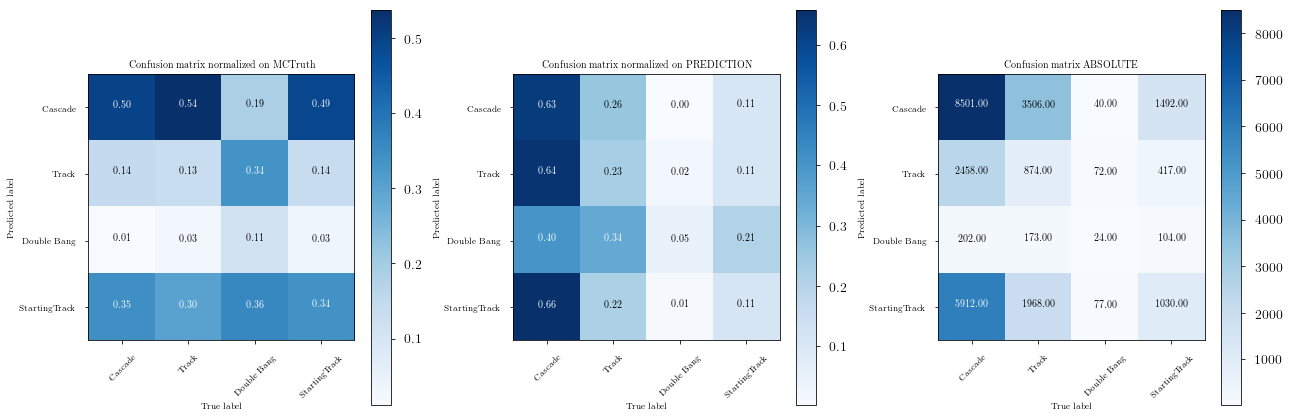

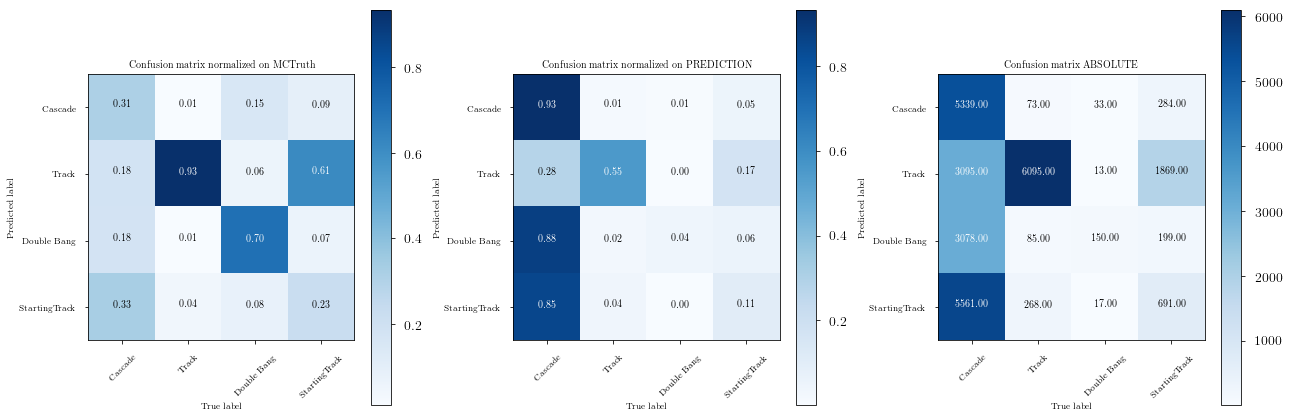

In [9]:
for i, ii in enumerate(epochs):
    model = "weights_" + epochs[i] +"_pred.pickle"
    file_path = os.path.join(MODEL_DIR, model)
    predictions_mctrue = pickle.load(file(file_path))
    #print "EPOCH {}".format(ii)
    pred = predictions_mctrue["prediction"][0] #list with probability for each class
    truth = predictions_mctrue["mc_truth"]["ClassificationLabel_truth"][:len(pred)]
    # ReTag ClassLabel to Labels which can be predicted
    truth = retag_classify_startTrack(truth)
    confusion_process(pred, truth)
